# Image Labeling

In [199]:
!pip install wget

In [200]:
!pip uninstall Cython -y

Found existing installation: Cython 3.0.8
Uninstalling Cython-3.0.8:
  Successfully uninstalled Cython-3.0.8


In [201]:
import os
import wget
import shutil

In [202]:
!mkdir Tensorflow

mkdir: cannot create directory ‘Tensorflow’: File exists


# 0. Setup Paths

In [203]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'create_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

files = {
        'PIPELINE_CONFIG': os.path.join('Tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME, 'pipeline.config'),
        'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
        'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [204]:
for path in paths.values():
    if not os.path.exists(path):
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [205]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4067, done.
remote: Counting objects: 100% (4067/4067), done.
remote: Compressing objects: 100% (3052/3052), done.
remote: Total 4067 (delta 1179), reused 2929 (delta 955), pack-reused 0
Receiving objects: 100% (4067/4067), 44.59 MiB | 29.03 MiB/s, done.
Resolving deltas: 100% (1179/1179), done.


In [206]:
ls

Cubes-5/  GenerateTFRecord/  models/  sample_data/  Tensorflow/  train/


In [207]:
cd Tensorflow/models/research/

/content/Tensorflow/models/research


In [208]:
!protoc object_detection/protos/*.proto --python_out=.

In [209]:
%cd /content/

/content


In [210]:
import re
with open('Tensorflow/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('Tensorflow/models/research/setup.py', 'w') as f:
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [211]:
!pip install pyyaml==5.3
!pip install Tensorflow/models/research/
!pip install tensorflow==2.8.0

  Using cached PyYAML-5.3-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tf-models-official 2.8.0 requires Cython, which is not installed.
dask 2023.8.1 requires pyyaml>=5.3.1, but you have pyyaml 5.3 which is incompatible.
distributed 2023.8.1 requires pyyaml>=5.3.1, but you have pyyaml 5.3 which is incompatible.
flax 0.8.1 requires PyYAML>=5.4.1, but you have pyyaml 5.3 which is incompatible.
roboflow 1.1.19 requires PyYAML>=5.3.1, but you have pyyaml 5.3 which is incompatible.


Processing ./Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Using cached Cython-3.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697352 sha256=bd9c677dd510f3b33e293571a270fb69f0521a3bdfaa621281bb0b7184e3757e
  Stored in directory: /tmp/pip-ephem-wheel-cache-nxwgx0vc/wheels/fb/c9/43/709f88e66b36649c7a29812ca4f6236f31caed949aabc3e335
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [212]:
%cd /content/

/content


In [213]:
!python Tensorflow/models/research/object_detection/builders/model_builder_tf2_test.py

2024-02-15 13:31:35.592426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unab

In [214]:
%cd /content/

/content


In [216]:
wget.download('http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz')
shutil.move(PRETRAINED_MODEL_NAME+".tar.gz", paths["PRETRAINED_MODEL_PATH"])

Error: Destination path 'Tensorflow/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz' already exists

In [217]:
%cd Tensorflow/workspace/pre-trained-models/

/content/Tensorflow/workspace/pre-trained-models


In [218]:
!tar -zxvf {PRETRAINED_MODEL_NAME+".tar.gz"}

ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [219]:
%cd ../..

/content/Tensorflow


In [220]:
%cd ..

/content


# 2. Connection to Roboflow

In [221]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="w7DdT0ct3T04B2jsikB1")
project = rf.workspace("pren-pc9i4").project("cubes-khnik")
dataset = project.version(5).download("tensorflow")

  Using cached PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (705 kB)
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.3
    Uninstalling PyYAML-5.3:
      Successfully uninstalled PyYAML-5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tf-models-official 2.8.0 requires pyyaml<6.0,>=5.1, but you have pyyaml 6.0.1 which is incompatible.


loading Roboflow workspace...
loading Roboflow project...


In [222]:
%cd /content/

/content


In [223]:
labels = [{'name':'Blue-Blue-Blue-Blue', 'id':1},{'name':'Blue-Blue-Blue-Nothing', 'id':2},{'name':'Blue-Blue-Blue-Red', 'id':3},{'name':'Blue-Blue-Blue-Yellow', 'id':4},
          {'name':'Blue-Blue-Nothing-Blue', 'id':5},{'name':'Blue-Blue-Nothing-Nothing', 'id':5},{'name':'Blue-Blue-Nothing-Red', 'id':6},{'name':'Blue-Blue-Nothing-Yellow', 'id':7},
          {'name':'Blue-Blue-Red-Blue', 'id':8},{'name':'Blue-Blue-Red-Nothing', 'id':9},{'name':'Blue-Blue-Red-Red', 'id':10},{'name':'Blue-Blue-Red-Yellow', 'id':11},
          {'name':'Blue-Blue-Yellow-Blue', 'id':12},{'name':'Blue-Blue-Yellow-Nothing', 'id':13},{'name':'Blue-Blue-Yellow-Red', 'id':14},{'name':'Blue-Blue-Yellow-Yellow', 'id':15},
          {'name':'Blue-Nothing-Nothing-Blue', 'id':16},{'name':'Blue-Nothing-Nothing-Nothing', 'id':17},{'name':'Blue-Nothing-Nothing-Red', 'id':18},{'name':'Blue-Nothing-Nothing-Yellow', 'id':19},
          {'name':'Blue-Red-Blue-Blue', 'id':20},{'name':'Blue-Red-Blue-Nothing', 'id':21},{'name':'Blue-Red-Blue-Red', 'id':22},{'name':'Blue-Red-Blue-Yellow', 'id':23},
          {'name':'Blue-Red-Nothing-Blue', 'id':24},{'name':'Blue-Red-Nothing-Nothing', 'id':25},{'name':'Blue-Red-Nothing-Red', 'id':26},{'name':'Blue-Red-Nothing-Yellow', 'id':27},
          {'name':'Blue-Red-Red-Blue', 'id':28},{'name':'Blue-Red-Red-Nothing', 'id':29},{'name':'Blue-Red-Red-Red', 'id':30},{'name':'Blue-Red-Red-Yellow', 'id':31},
          {'name':'Blue-Red-Yellow-Blue', 'id':32},{'name':'Blue-Red-Yellow-Nothing', 'id':33},{'name':'Blue-Red-Yellow-Red', 'id':34},{'name':'Blue-Red-Yellow-Yellow', 'id':35},
          {'name':'Blue-Yellow-Blue-Blue', 'id':36},{'name':'Blue-Yellow-Blue-Nothing', 'id':37},{'name':'Blue-Yellow-Blue-Red', 'id':38},{'name':'Blue-Yellow-Blue-Yellow', 'id':39},
          {'name':'Blue-Yellow-Nothing-Blue', 'id':40},{'name':'Blue-Yellow-Nothing-Nothing', 'id':41},{'name':'Blue-Yellow-Nothing-Red', 'id':42},{'name':'Blue-Yellow-Nothing-Yellow', 'id':43},
          {'name':'Blue-Yellow-Red-Blue', 'id':44},{'name':'Blue-Yellow-Red-Nothing', 'id':45},{'name':'Blue-Yellow-Red-Red', 'id':46},{'name':'Blue-Yellow-Red-Yellow', 'id':47},
          {'name':'Blue-Yellow-Yellow-Blue', 'id':48},{'name':'Blue-Yellow-Yellow-Nothing', 'id':49},{'name':'Blue-Yellow-Yellow-Red', 'id':50},{'name':'Blue-Yellow-Yellow-Yellow', 'id':51},
          {'name':'Nothing-Blue-Blue-Nothing', 'id':52},{'name':'Nothing-Blue-Nothing-Nothing', 'id':53},{'name':'Nothing-Blue-Red-Nothing', 'id':54},{'name':'Nothing-Blue-Yellow-Nothing', 'id':55},
          {'name':'Nothing-Nothing-Nothing-Nothing', 'id':56},{'name':'Nothing-Nothing-Yellow-Nothing', 'id':57},{'name':'Nothing-Red-Blue-Nothing', 'id':58},{'name':'Nothing-Red-Nothing-Nothing', 'id':59},
          {'name':'Nothing-Red-Red-Nothing', 'id':60},{'name':'Nothing-Red-Yellow-Nothing', 'id':61},{'name':'Nothing-Yellow-Blue-Nothing', 'id':62},{'name':'Nothing-Yellow-Red-Nothing', 'id':63},
          {'name':'Nothing-Yellow-Yellow-Nothing', 'id':64},{'name':'Red-Blue-Blue-Blue', 'id':65},{'name':'Red-Blue-Blue-Nothing', 'id':66},{'name':'Red-Blue-Blue-Red', 'id':67},
          {'name':'Red-Blue-Blue-Yellow', 'id':68},{'name':'Red-Blue-Nothing-Blue', 'id':69},{'name':'Red-Blue-Nothing-Nothing', 'id':70},{'name':'Red-Blue-Nothing-Red', 'id':71},
          {'name':'Red-Blue-Nothing-Yellow', 'id':72},{'name':'Red-Blue-Red-Blue', 'id':73},{'name':'Red-Blue-Red-Nothing', 'id':74},{'name':'Red-Blue-Red-Red', 'id':75},
          {'name':'Red-Blue-Red-Yellow', 'id':76},{'name':'Red-Blue-Yellow-Blue', 'id':77},{'name':'Red-Blue-Yellow-Nothing', 'id':78},{'name':'Red-Blue-Yellow-Red', 'id':79},
          {'name':'Red-Blue-Yellow-Yellow', 'id':80},{'name':'Red-Nothing-Nothing-Blue', 'id':81},{'name':'Red-Nothing-Nothing-Nothing', 'id':82},{'name':'Red-Nothing-Nothing-Red', 'id':83},
          {'name':'Red-Nothing-Nothing-Yellow', 'id':84},{'name':'Red-Red-Blue-Blue', 'id':85},{'name':'Red-Red-Blue-Nothing', 'id':86},{'name':'Red-Red-Blue-Red', 'id':87},
          {'name':'Red-Red-Blue-Yellow', 'id':88},{'name':'Red-Red-Nothing-Blue', 'id':89},{'name':'Red-Red-Nothing-Nothing', 'id':90},{'name':'Red-Red-Nothing-Red', 'id':91},
          {'name':'Red-Red-Nothing-Yellow', 'id':92},{'name':'Red-Red-Red-Blue', 'id':93},{'name':'Red-Red-Red-Nothing', 'id':94},{'name':'Red-Red-Red-Red', 'id':95},
          {'name':'Red-Red-Red-Yellow', 'id':96},{'name':'Red-Red-Yellow-Blue', 'id':97},{'name':'Red-Red-Yellow-Nothing', 'id':98},{'name':'Red-Red-Yellow-Red', 'id':99},
          {'name':'Red-Red-Yellow-Yellow', 'id':100},{'name':'Red-Yellow-Blue-Blue', 'id':101},{'name':'Red-Yellow-Blue-Nothing', 'id':102},{'name':'Red-Yellow-Blue-Red', 'id':103},
          {'name':'Red-Yellow-Blue-Yellow', 'id':104},{'name':'Red-Yellow-Nothing-Blue', 'id':105},{'name':'Red-Yellow-Nothing-Nothing', 'id':106},{'name':'Red-Yellow-Nothing-Red', 'id':107},
          {'name':'Red-Yellow-Nothing-Yellow', 'id':108},{'name':'Red-Yellow-Red-Blue', 'id':109},{'name':'Red-Yellow-Red-Nothing', 'id':110},{'name':'Red-Yellow-Red-Red', 'id':111},
          {'name':'Red-Yellow-Red-Yellow', 'id':112},{'name':'Red-Yellow-Yellow-Blue', 'id':113},{'name':'Red-Yellow-Yellow-Nothing', 'id':114},{'name':'Red-Yellow-Yellow-Red', 'id':115},
          {'name':'Red-Yellow-Yellow-Yellow', 'id':116},{'name':'Yellow-Blue-Blue-Blue', 'id':117},{'name':'Yellow-Blue-Blue-Nothing', 'id':118},{'name':'Yellow-Blue-Blue-Red', 'id':119},
          {'name':'Yellow-Blue-Blue-Yellow', 'id':120},{'name':'Yellow-Blue-Nothing-Blue', 'id':121},{'name':'Yellow-Blue-Nothing-Nothing', 'id':122},{'name':'Yellow-Blue-Nothing-Red', 'id':123},
          {'name':'Yellow-Blue-Nothing-Yellow', 'id':124},{'name':'Yellow-Blue-Red-Blue', 'id':125},{'name':'Yellow-Blue-Red-Nothing', 'id':126},{'name':'Yellow-Blue-Red-Red', 'id':127},
          {'name':'Yellow-Blue-Red-Yellow', 'id':128},{'name':'Yellow-Blue-Yellow-Blue', 'id':129},{'name':'Yellow-Blue-Yellow-Nothing', 'id':130},{'name':'Yellow-Blue-Yellow-Red', 'id':131},
          {'name':'Yellow-Blue-Yellow-Yellow', 'id':132},{'name':'Yellow-Nothing-Nothing-Blue', 'id':133},{'name':'Yellow-Nothing-Nothing-Nothing', 'id':134},{'name':'Yellow-Nothing-Nothing-Red', 'id':135},
          {'name':'Yellow-Nothing-Nothing-Yellow', 'id':136},{'name':'Yellow-Red-Blue-Blue', 'id':137},{'name':'Yellow-Red-Blue-Nothing', 'id':138},{'name':'Yellow-Red-Blue-Red', 'id':139},
          {'name':'Yellow-Red-Blue-Yellow', 'id':140},{'name':'Yellow-Red-Nothing-Blue', 'id':141},{'name':'Yellow-Red-Nothing-Nothing', 'id':142},{'name':'Yellow-Red-Nothing-Red', 'id':143},
          {'name':'Yellow-Red-Nothing-Yellow', 'id':144},{'name':'Yellow-Red-Red-Blue', 'id':145},{'name':'Yellow-Red-Red-Nothing', 'id':146},{'name':'Yellow-Red-Red-Red', 'id':147},
          {'name':'Yellow-Red-Red-Yellow', 'id':148},{'name':'Yellow-Red-Yellow-Blue', 'id':149},{'name':'Yellow-Red-Yellow-Nothing', 'id':150},{'name':'Yellow-Red-Yellow-Red', 'id':151},
          {'name':'Yellow-Red-Yellow-Yellow', 'id':152},{'name':'Yellow-Yellow-Blue-Blue', 'id':153},{'name':'Yellow-Yellow-Blue-Nothing', 'id':154},{'name':'Yellow-Yellow-Blue-Red', 'id':155},
          {'name':'Yellow-Yellow-Blue-Yellow', 'id':156},{'name':'Yellow-Yellow-Nothing-Blue', 'id':157},{'name':'Yellow-Yellow-Nothing-Nothing', 'id':158},{'name':'Yellow-Yellow-Nothing-Red', 'id':159},
          {'name':'Yellow-Yellow-Nothing-Yellow', 'id':160},{'name':'Yellow-Yellow-Red-Blue', 'id':161},{'name':'Yellow-Yellow-Red-Nothing', 'id':162},{'name':'Yellow-Yellow-Red-Red', 'id':163},
          {'name':'Yellow-Yellow-Red-Yellow', 'id':164},{'name':'Yellow-Yellow-Yellow-Blue', 'id':165},{'name':'Yellow-Yellow-Yellow-Nothing', 'id':166},{'name':'Yellow-Yellow-Yellow-Red', 'id':167},
          {'name':'Yellow-Yellow-Yellow-Yellow', 'id':168}]


with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [224]:
# Datei hochladen "create_tfrecord"

In [225]:
!python3 /content/Tensorflow/scripts/create_tfrecord.py --csv_input=/content/Tensorflow/workspace/images/train/_annotations.csv --labelmap=/content/Tensorflow/workspace/annotations/label_map.pbtxt --image_dir=/content/Tensorflow/workspace/images/train --output_path=/content/Tensorflow/workspace/annotations/train.record

Successfully created the TFRecords: /content/Tensorflow/workspace/annotations/train.record


In [226]:
ls

 Cubes-5/            sample_data/                                                Tensorflow/
 GenerateTFRecord/  'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar (1).gz'   train/
 models/             ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz


In [227]:
cd /content/

/content


In [228]:
#!python3 /content/Tensorflow/scripts/generate_tfrecord.py --csv_input=/content/Cubes-4/train/_annotations.csv --labelmap=/content/Tensorflow/workspace/annotations/label_map.pbtxt --image_dir=/content/Cubes-4/train --output_path=train.record

# 4. Copy Model Config to Training Folder

In [229]:
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [230]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [231]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [232]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [233]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [265]:
pipeline_config.train_config.batch_size = 8
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [266]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], 'wb') as f:
    f.write(config_text)

In [267]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

# 6. Train the model

In [268]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=7500".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'])

In [269]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=7500


In [ ]:
!{command}

2024-02-15 13:45:46.241911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unab

# 7. Evaluate the Model

In [240]:
command = "python {} --model_dir={} --pipeline_config_path={} --check_point_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [241]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --check_point_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [242]:
!{command}

2024-02-15 13:36:58.085348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unab

# 8. Load Train Model From Checkpoint

In [243]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [244]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-2')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [245]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [246]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [247]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', "d6a2da53-8f53-11ee-b7b4-8cf8c50016cf.jpg")

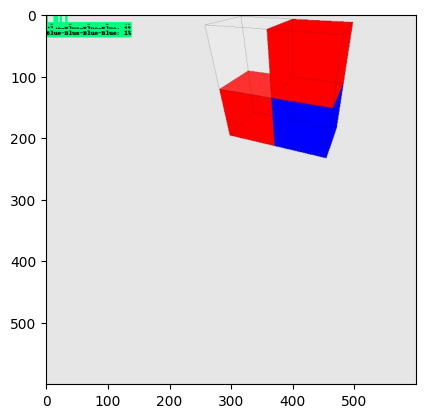

In [249]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.001,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
FREEEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --outbut_directory={}.format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 10. Freezing the Graph

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --outbut_directory={}.format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection','export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'])

In [ ]:
print(command)

In [ ]:
!{command}

# 12. Conversion to TFLite

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')